In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
d19=pd.read_csv(r"C:\Energia\Articulos\dgt\csv\ProvBarce19.csv",sep=";")
d20=pd.read_csv(r"C:\Energia\Articulos\dgt\csv\ProvBarce20.csv",sep=";",encoding="ISO-8859-1" )
d21=pd.read_csv(r"C:\Energia\Articulos\dgt\csv\ProvBarce21.csv",sep=";",encoding="ISO-8859-1")
d22=pd.read_csv(r"C:\Energia\Articulos\dgt\csv\ProvBarce22.csv",sep=";")

In [10]:
df = pd.concat([d19,d20,d21,d22], ignore_index=True)

In [160]:
 df["propulsion"]= df["propulsion"].apply(lambda x: str(x))

In [241]:
df.to_csv("matriculas.csv")

In [164]:
NaN=[" ","  ","   "]

In [165]:
dff = pd.read_csv("matriculas.csv",na_values=NaN)

In [174]:
dff["propulsion"]= dff["propulsion"].apply(lambda x: str(x))

In [179]:
dff["date"]=pd.to_datetime ({"year":2000+dff["Ano"], "month":dff["Mes"], "day":1})

In [68]:
dff.head()

,Unnamed: 0,Ano,Mes,clase de matricula,propulsion,servicio,tramitacion,codigo postal,municipio,cod muni,date
0,0,19,1,0,0,B00,1,8397,PINEDA DE MAR,8163,2019-01-01
1,1,19,1,0,0,B00,1,8850,GAVA,8089,2019-01-01
2,2,19,1,6,0,B00,1,8005,BARCELONA,8019,2019-01-01
3,3,19,1,0,0,B00,1,8500,VIC,8298,2019-01-01
4,4,19,1,0,0,B00,1,8028,BARCELONA,8019,2019-01-01


In [181]:
periodo=dff.loc[dff["Ano"].isin([19,20,21,22])]

In [182]:
periodo2=periodo.loc[dff["servicio"].isin(["B00"])]
periodo3=periodo2.loc[dff["tramitacion"].isin(["1"])]
periodo4=periodo3.loc[dff["clase de matricula"].isin([0])]

In [183]:
periodo4["tramitacion"]= periodo4["tramitacion"].apply(lambda x: int(x))

In [24]:
periodo4

,Unnamed: 0,Ano,Mes,clase de matricula,propulsion,servicio,tramitacion,codigo postal,municipio,cod muni,date
0,0,19,1,0,0,B00,1,8397,PINEDA DE MAR,8163,2019-01-01
1,1,19,1,0,0,B00,1,8850,GAVA,8089,2019-01-01
3,3,19,1,0,0,B00,1,8500,VIC,8298,2019-01-01
4,4,19,1,0,0,B00,1,8028,BARCELONA,8019,2019-01-01
5,5,19,1,0,0,B00,1,8100,MOLLET DEL VALLES,8124,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...
605236,605236,22,8,0,0,B00,1,8304,MATARO,8121,2022-08-01
605237,605237,22,8,0,0,B00,1,8031,BARCELONA,8019,2022-08-01
605238,605238,22,8,0,0,B00,1,8256,AGUILAR DE SEGARRA,8002,2022-08-01
605239,605239,22,8,0,0,B00,1,8915,BADALONA,8015,2022-08-01


In [188]:
x= periodo4.pivot_table( index="codigo postal", columns= "date",values=["propulsion"], aggfunc= "count")
x

propulsion                                              \
date          2019-01-01 2019-02-01 2019-03-01 2019-04-01 2019-05-01   
codigo postal                                                          
8001                24.0       24.0       16.0       40.0       52.0   
8002                17.0       12.0       18.0       10.0       18.0   
8003                45.0       34.0       37.0       41.0       61.0   
8004                48.0       61.0       44.0       59.0       92.0   
8005                74.0       70.0       92.0       73.0      106.0   
...                  ...        ...        ...        ...        ...   
8950               104.0       95.0      140.0      127.0      159.0   
8960                53.0       55.0       53.0       41.0       64.0   
8970                65.0       65.0       69.0       68.0       98.0   
8980                87.0       84.0       93.0      108.0      118.0   
43421                NaN        NaN        NaN        NaN        NaN   

                                                                      ...  \
date          2019-06-01 2019-07-01 2019-08-01 2019-09-01 2019-10-01  ...   
codigo postal                                                         ...   
8001                26.0       58.0       24.0       26.0       34.0  ...   
8002                23.0       27.0       18.0       16.0       12.0  ...   
8003                48.0       66.0       29.0       47.0       54.0  ...   
8004                73.0       91.0       50.0       57.0       83.0  ...   
8005                94.0      104.0       40.0       64.0      102.0  ...   
...                  ...        ...        ...        ...        ...  ...   
8950               229.0      126.0      100.0       96.0      127.0  ...   
8960                56.0       70.0       51.0       54.0       95.0  ...   
8970                73.0      102.0       47.0       74.0       81.0  ...   
8980                95.0      110.0       59.0       68.0       99.0  ...   
43421                NaN        NaN        NaN        NaN        1.0  ...   

                                                                      \
date          2021-11-01 2021-12-01 2022-01-01 2022-02-01 2022-03-01   
codigo postal                                                          
8001                66.0       25.0       14.0       23.0       20.0   
8002                13.0       21.0       11.0       14.0       12.0   
8003               143.0      199.0       41.0       28.0      291.0   
8004                45.0       48.0       24.0       48.0       42.0   
8005                99.0       63.0       51.0       45.0       58.0   
...                  ...        ...        ...        ...        ...   
8950                91.0       67.0       55.0       69.0       64.0   
8960                48.0       46.0       29.0       44.0       39.0   
8970                71.0       81.0       43.0       67.0       66.0   
8980                90.0       85.0       48.0       67.0       72.0   
43421                NaN        NaN        NaN        NaN        NaN   

                                                                      
date          2022-04-01 2022-05-01 2022-06-01 2022-07-01 2022-08-01  
codigo postal                                                         
8001                21.0       37.0       35.0       34.0       27.0  
8002                 5.0       18.0       16.0       22.0        8.0  
8003                25.0       28.0       21.0       34.0       26.0  
8004                42.0       54.0       41.0       43.0       24.0  
8005                70.0       94.0       83.0       71.0       36.0  
...                  ...        ...        ...        ...        ...  
8950                51.0       55.0       63.0       75.0       37.0  
8960                32.0       51.0       34.0       36.0       26.0  
8970                55.0       79.0       63.0       62.0       37.0  
8980                61.0       78.0       60.0       83.0       4

In [245]:
x.columns=x.columns.droplevel()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [190]:
x


date,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,...,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01
codigo postal,,,,,,,,,,,,,,,,,,,,,
8001,24.0,24.0,16.0,40.0,52.0,26.0,58.0,24.0,26.0,34.0,...,66.0,25.0,14.0,23.0,20.0,21.0,37.0,35.0,34.0,27.0
8002,17.0,12.0,18.0,10.0,18.0,23.0,27.0,18.0,16.0,12.0,...,13.0,21.0,11.0,14.0,12.0,5.0,18.0,16.0,22.0,8.0
8003,45.0,34.0,37.0,41.0,61.0,48.0,66.0,29.0,47.0,54.0,...,143.0,199.0,41.0,28.0,291.0,25.0,28.0,21.0,34.0,26.0
8004,48.0,61.0,44.0,59.0,92.0,73.0,91.0,50.0,57.0,83.0,...,45.0,48.0,24.0,48.0,42.0,42.0,54.0,41.0,43.0,24.0
8005,74.0,70.0,92.0,73.0,106.0,94.0,104.0,40.0,64.0,102.0,...,99.0,63.0,51.0,45.0,58.0,70.0,94.0,83.0,71.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,104.0,95.0,140.0,127.0,159.0,229.0,126.0,100.0,96.0,127.0,...,91.0,67.0,55.0,69.0,64.0,51.0,55.0,63.0,75.0,37.0
8960,53.0,55.0,53.0,41.0,64.0,56.0,70.0,51.0,54.0,95.0,...,48.0,46.0,29.0,44.0,39.0,32.0,51.0,34.0,36.0,26.0
8970,65.0,65.0,69.0,68.0,98.0,73.0,102.0,47.0,74.0,81.0,...,71.0,81.0,43.0,67.0,66.0,55.0,79.0,63.0,62.0,37.0


In [36]:
x.to_csv("codigo_mes.csv")

In [249]:
ww=periodo4["date"].value_counts()

In [193]:
electricos=periodo4.loc[dff["propulsion"].isin(["2"])]

In [194]:
e=electricos.pivot_table( index="codigo postal", columns= "date",values=["propulsion"], aggfunc= "count")

In [195]:
e.columns=e.columns.droplevel()

In [197]:
e

date,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,...,2021-11-01,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01
codigo postal,,,,,,,,,,,,,,,,,,,,,
8001,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN
8002,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,...,NaN,3.0,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN
8003,NaN,NaN,3.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,...,104.0,169.0,22.0,4.0,253.0,NaN,3.0,NaN,NaN,2.0
8004,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,1.0,2.0,...,1.0,NaN,1.0,NaN,1.0,4.0,1.0,NaN,2.0,NaN
8005,2.0,3.0,7.0,NaN,NaN,5.0,1.0,1.0,NaN,3.0,...,6.0,NaN,4.0,3.0,3.0,2.0,3.0,9.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,1.0,1.0,2.0,NaN,NaN,4.0,2.0,NaN,NaN,3.0,...,1.0,5.0,NaN,2.0,2.0,4.0,1.0,3.0,2.0,4.0
8950,1.0,1.0,1.0,1.0,20.0,4.0,NaN,4.0,3.0,8.0,...,11.0,7.0,8.0,3.0,2.0,5.0,3.0,7.0,9.0,5.0
8960,NaN,1.0,1.0,NaN,2.0,3.0,2.0,1.0,2.0,5.0,...,NaN,2.0,4.0,7.0,3.0,4.0,2.0,4.0,2.0,NaN


In [43]:
e.to_csv("codigo_meselec.csv")

In [198]:
w=electricos["date"].value_counts()
w.to_csv("electricos2.csv")

In [199]:
dataa=pd.concat((ww,w), axis=1)

In [200]:
dataa.columns=["total", "electricos"]

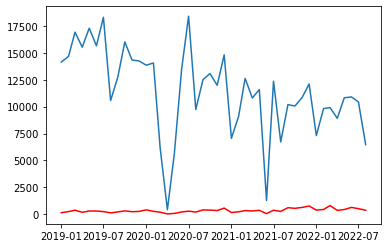

In [65]:
plt.plot(dataa.index, dataa["total"])
plt.plot(dataa.index, dataa["electricos"], c="r")
plt.show()

In [202]:
import statsmodels.api as sm
import scipy.stats as stats
import scipy as sp
from sklearn.preprocessing import PolynomialFeatures

In [203]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
dataa_ciclo, dataa_tend = sm.tsa.filters.hpfilter(dataa['total'])
dataa['tend'] = dataa_tend


In [219]:
fecha=list(range(44))
fechaa=np.reshape(fecha,(1, -1))

In [246]:
x=fecha

In [71]:
# Modeling with Numpy
def equation(a, b):
    """Return a 1D polynomial."""
    return np.poly1d(a, b,3) 

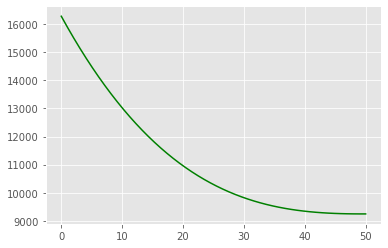

In [207]:
import numpy
MEDV_LSTAT = numpy.poly1d(numpy.polyfit(fecha,dataa["tend"],3))

Line1= numpy.linspace(0,50)
plt.plot(Line1, MEDV_LSTAT(Line1),c="g")
plt.show() 

In [209]:
y = dataa["tend"].values
y

array([16074.36016201, 15785.92753118, 15496.28842524, 15203.53578939,
       14906.64926356, 14604.8100278 , 14298.68510639, 13989.59414231,
       13681.35947539, 13375.66369909, 13073.61293221, 12777.96225374,
       12492.25135957, 12220.93559421, 11969.31889505, 11743.85211473,
       11547.3396566 , 11375.51289143, 11220.42860269, 11075.44012831,
       10938.38616335, 10806.26637776, 10677.06457517, 10550.1793927 ,
       10425.82442712, 10306.87628809, 10194.10481999, 10087.52806952,
        9988.68214287,  9899.55031619,  9823.11731429,  9756.98251802,
        9700.33398494,  9650.46415849,  9604.9721484 ,  9561.70864931,
        9519.30312324,  9477.97333933,  9436.55687723,  9394.1063333 ,
        9349.96833082,  9303.19130163,  9253.74244734,  9202.58885003])

In [210]:
x = fecha
y = dataa["tend"].values
p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
y_model = equation(p, x)

In [211]:
t = stats.t.ppf(0.975,0)   

# Tendencias

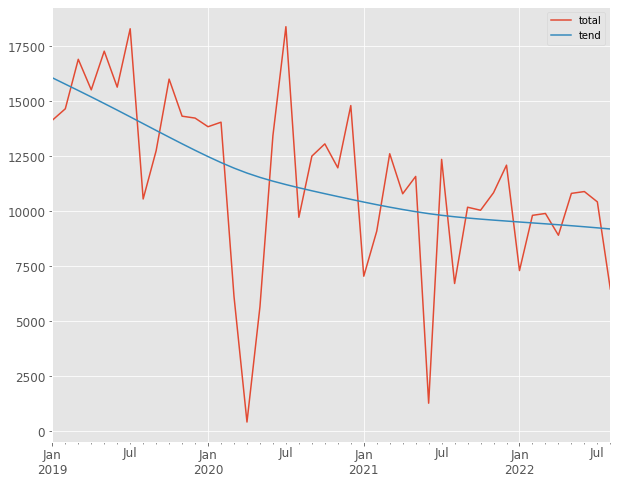

In [218]:
 #graficando la variacion del precio real con la tendencia.
dataa[['total', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

In [222]:
pip install bootstrap4

Note: you may need to restart the kernel to use updated packages.


In [223]:
x=pd.DataFrame(fecha)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     5.392
Date:                Tue, 18 Oct 2022   Prob (F-statistic):            0.00327
Time:                        14:02:17   Log-Likelihood:                -419.17
No. Observations:                  44   AIC:                             846.3
Df Residuals:                      40   BIC:                             853.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.666e+04   1932.543      8.622      0.0

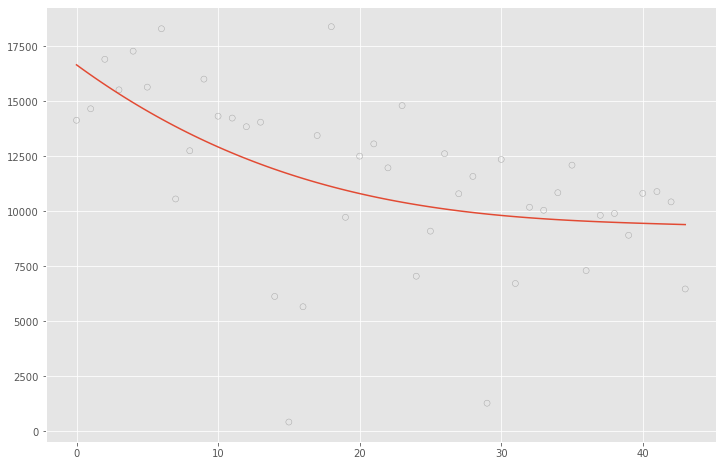

In [226]:
poly = PolynomialFeatures(3)
x=np.array(x).reshape(-1,1)
X = poly.fit_transform(x)
y = y2
# X.shape

model = sm.OLS(y,X).fit()
print(model.summary())

# So, what we want here is not only the final line, but also the standart error related to the line
# TO find that we need to calcualte the predictions for some values of age
test_ages = np.linspace(x.min(),x.max(),100)

X_test = poly.transform(test_ages.reshape(-1,1))
pred = model.predict(X_test)

plt.figure(figsize = (12,8))
plt.scatter(x,y2,facecolors='none', edgecolors='darkgray')
plt.plot(test_ages,pred)

In [227]:
poly = PolynomialFeatures(3)
x=np.array(x).reshape(-1,1)
X = poly.fit_transform(x)
y = y2

X_test = np.linspace(x.min(),x.max(),100)
X_test_poly = poly.transform(X_test.reshape(-1,1))


bootstrap = Bootstrap_ci()

li,ui = bootstrap.boot(pd.DataFrame(X),pd.DataFrame(y2),1000,X_test_poly,LinearRegression())

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 232.03it/s]


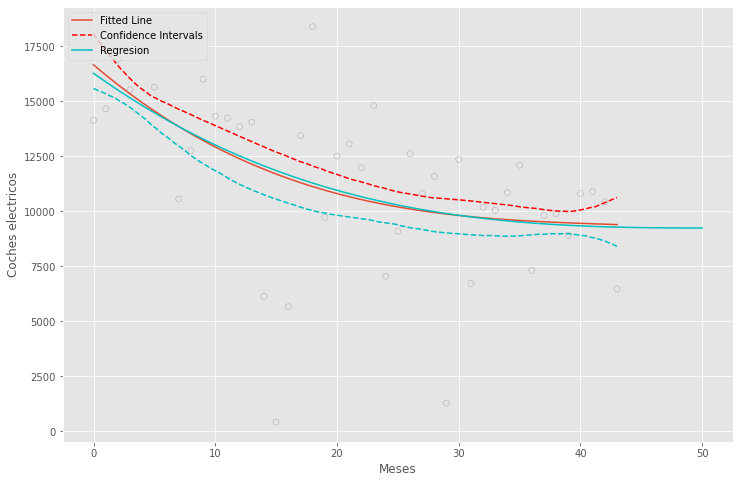

In [231]:
plt.figure(figsize = (12,8))
plt.scatter(x,y2,facecolors='none', edgecolors='darkgray')
plt.plot(test_ages,pred,label = "Fitted Line")
         
plt.plot(test_ages,ui,linestyle = 'dashed',color = 'r',label = 'Confidence Intervals')
plt.plot(test_ages,li,linestyle = 'dashed',color = 'c')
Line1= np.linspace(0,50)
plt.plot(Line1, MEDV_LSTAT(Line1),c="c", label="Regresion")

plt.xlabel("Meses")
plt.ylabel("Coches electricos")
plt.legend(loc='upper left')
plt.show()


In [233]:
y3 = dataa["electricos"].values
y3

array([146, 250, 379, 186, 305, 301, 251, 133, 218, 315, 240, 266, 408,
       274, 194,  34,  81, 213, 292, 206, 407, 387, 350, 574, 165, 229,
       342, 310, 367,  58, 376, 266, 611, 553, 638, 770, 383, 445, 812,
       361, 441, 640, 520, 372], dtype=int64)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     8.997
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           0.000112
Time:                        15:30:09   Log-Likelihood:                -278.17
No. Observations:                  44   AIC:                             564.3
Df Residuals:                      40   BIC:                             571.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        292.3149     78.425      3.727      0.0

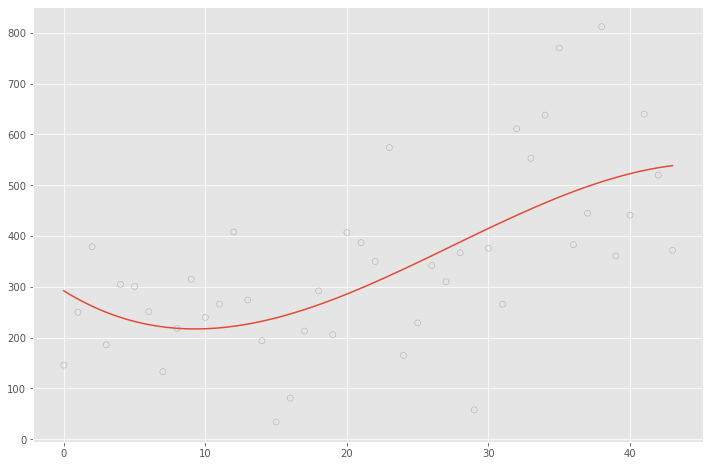

In [234]:
poly = PolynomialFeatures(3)
x=np.array(x).reshape(-1,1)
X = poly.fit_transform(x)
y = y3
# X.shape

model = sm.OLS(y,X).fit()
print(model.summary())

# So, what we want here is not only the final line, but also the standart error related to the line
# TO find that we need to calcualte the predictions for some values of age
test_ages = np.linspace(x.min(),x.max(),100)

X_test = poly.transform(test_ages.reshape(-1,1))
pred = model.predict(X_test)

plt.figure(figsize = (12,8))
plt.scatter(x,y3,facecolors='none', edgecolors='darkgray')
plt.plot(test_ages,pred)

In [235]:
poly = PolynomialFeatures(3)
x=np.array(x).reshape(-1,1)
X = poly.fit_transform(x)
y = y3

X_test = np.linspace(x.min(),x.max(),100)
X_test_poly = poly.transform(X_test.reshape(-1,1))


bootstrap = Bootstrap_ci()

li,ui = bootstrap.boot(pd.DataFrame(X),pd.DataFrame(y3),1000,X_test_poly,LinearRegression())

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 231.45it/s]


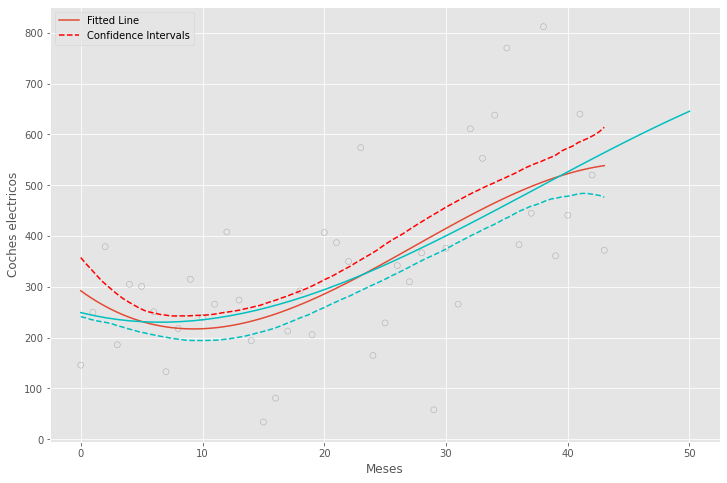

In [240]:
plt.figure(figsize = (12,8))
plt.scatter(x,y3,facecolors='none', edgecolors='darkgray')
plt.plot(test_ages,pred,label = "Fitted Line")
         
plt.plot(test_ages,ui,linestyle = 'dashed',color = 'r',label = 'Confidence Intervals')
plt.plot(test_ages,li,linestyle = 'dashed',color = 'c')
Line1= numpy.linspace(0,50)
plt.plot(Line1, MEDV_LSTAT(Line1),c="c")

plt.xlabel("Meses")
plt.ylabel("Coches electricos")
plt.legend(loc='upper left')
plt.show()


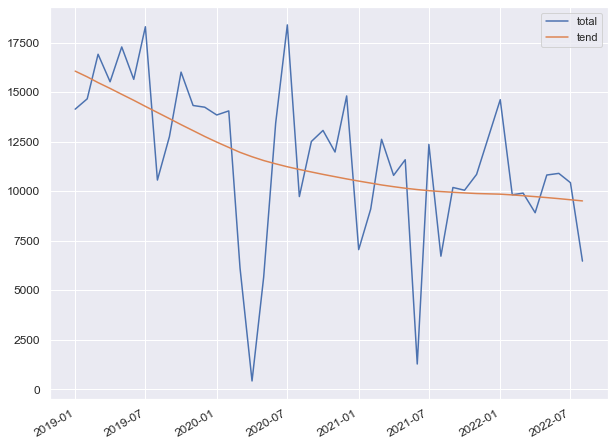

In [185]:
 #graficando la variacion del precio real con la tendencia.
dataa[['total', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

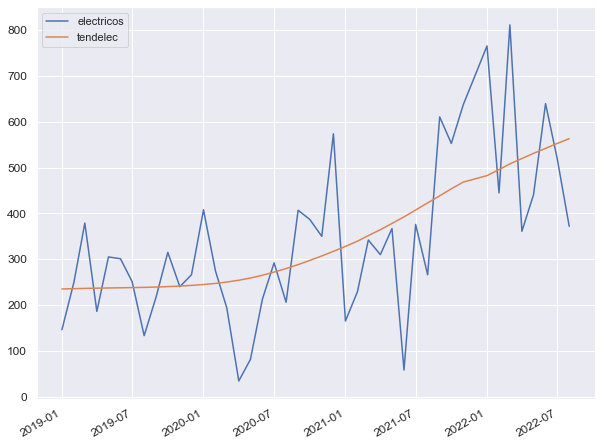

In [190]:
 #graficando la variacion del precio real con la tendencia.
dataa[['electricos', 'tendelec']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

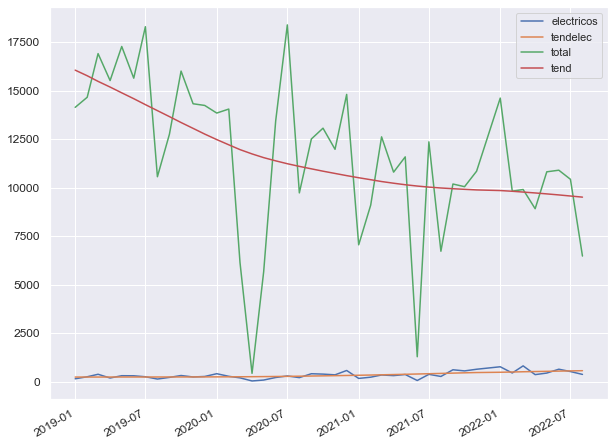

In [195]:
 #graficando la variacion del precio real con la tendencia.
dataa[['electricos', 'tendelec',"total","tend"]].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);


## Extras pero que a la final no use 

In [202]:
#from statsmodels.tsa.seasonal import seasonal_decompose
  
#result = seasonal_decompose(dataa['total'],model ='multiplicative',period=30)
#result.plot()  faltan ma obsrvaciones 60 y tengo solo 43

In [149]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/

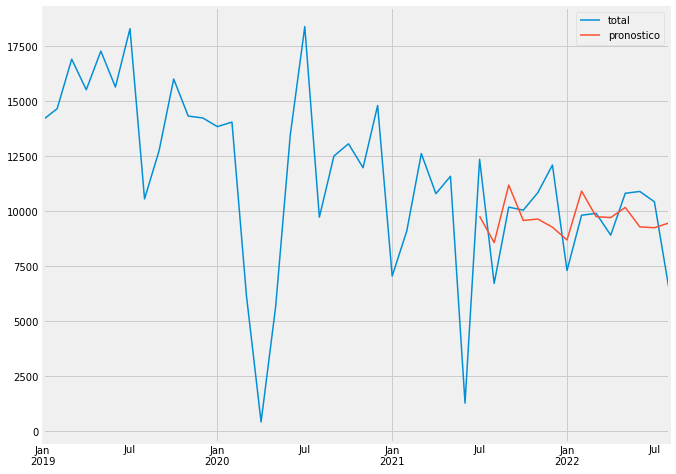

In [251]:
# Modelo ARIMA sobre el valor de cierre de la acción.
modelo = sm.tsa.ARIMA(dataa['total'].iloc[30:], order=(1, 0, 0))  
resultados = modelo.fit()  
dataa['pronostico'] = resultados.fittedvalues  
plot = dataa[['total', 'pronostico']].plot(figsize=(10, 8)) 

In [ ]:
#https://www.statsmodels.org/devel/examples/notebooks/generated/statespace_forecasting.html

In [252]:
# Construct the model
mod = sm.tsa.SARIMAX(dataa['total'].iloc[30:],  order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())



                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                   14
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -123.465
Date:                Thu, 13 Oct 2022   AIC                            252.929
Time:                        16:38:27   BIC                            254.847
Sample:                    07-31-2021   HQIC                           252.752
                         - 08-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.361e+04   3768.560      3.611      0.000    6221.685     2.1e+04
ar.L1         -0.3914      0.354     -1.106      0.269      -1.085       0.302
sigma2      2.388e+06   1.11e+06      2.155      0.0

In [253]:
print(res.forecast(steps=12))



2022-09-30    11073.507780
2022-10-31     9273.578594
2022-11-30     9978.099545
2022-12-31     9702.338824
2023-01-31     9810.275962
2023-02-28     9768.027647
2023-03-31     9784.564311
2023-04-30     9778.091597
2023-05-31     9780.625120
2023-06-30     9779.633459
2023-07-31     9780.021611
2023-08-31     9779.869682
Freq: M, Name: predicted_mean, dtype: float64


In [254]:
fcast_res5 = res.get_forecast(steps=12)
# Note: since we did not specify the alpha parameter, the
# confidence level is at the default, 95%
print(fcast_res5.summary_frame())



total               mean      mean_se  mean_ci_lower  mean_ci_upper
2022-09-30  11073.507780  1545.272527    8044.829282   14102.186279
2022-10-31   9273.578594  1659.428752    6021.158005   12525.999183
2022-11-30   9978.099545  1676.231578    6692.746023   13263.453067
2022-12-31   9702.338824  1678.791022    6411.968883   12992.708765
2023-01-31   9810.275962  1679.182801    6519.138149   13101.413775
2023-02-28   9768.027647  1679.242816    6476.772207   13059.283087
2023-03-31   9784.564311  1679.252010    6493.290850   13075.837772
2023-04-30   9778.091597  1679.253419    6486.815375   13069.367819
2023-05-31   9780.625120  1679.253635    6489.348475   13071.901765
2023-06-30   9779.633459  1679.253668    6488.356749   13070.910169
2023-07-31   9780.021611  1679.253673    6488.744891   13071.298331
2023-08-31   9779.869682  1679.253674    6488.592961   13071.146403


In [137]:
dataa.index=index


In [9]:
index2=pd.date_range(start="2019", periods=56, freq="M")

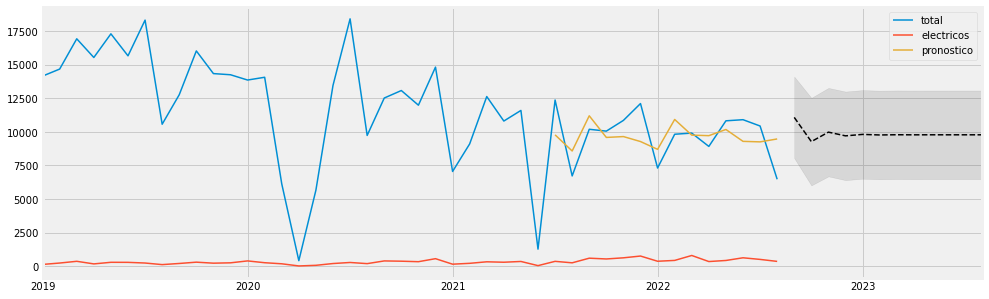

In [255]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)d
dataa.loc['2019':].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast('2023-08-31').summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

In [256]:
# Construct the model
mod = sm.tsa.SARIMAX(dataa['electricos'].iloc[30:],  order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:             electricos   No. Observations:                   14
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -90.624
Date:                Thu, 13 Oct 2022   AIC                            187.248
Time:                        16:39:16   BIC                            189.166
Sample:                    07-31-2021   HQIC                           187.071
                         - 08-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    587.5929    187.100      3.141      0.002     220.884     954.302
ar.L1         -0.1372      0.373     -0.368      0.713      -0.868       0.594
sigma2      2.483e+04   1.39e+04      1.788      0.0

In [257]:
print(res.forecast(steps=6))

2022-09-30    536.563575
2022-10-31    513.989464
2022-11-30    517.086082
2022-12-31    516.661301
2023-01-31    516.719571
2023-02-28    516.711578
Freq: M, Name: predicted_mean, dtype: float64


In [259]:
fcast_res5 = res.get_forecast(steps=6)
# Note: since we did not specify the alpha parameter, the
# confidence level is at the default, 95%
print(fcast_res5.summary_frame())


electricos        mean     mean_se  mean_ci_lower  mean_ci_upper
2022-09-30  536.563575  157.574022     227.724167     845.402983
2022-10-31  513.989464  159.049660     202.257859     825.721069
2022-11-30  517.086082  159.077296     205.300311     828.871852
2022-12-31  516.661301  159.077816     204.874512     828.448091
2023-01-31  516.719571  159.077826     204.932762     828.506380
2023-02-28  516.711578  159.077826     204.924769     828.498387


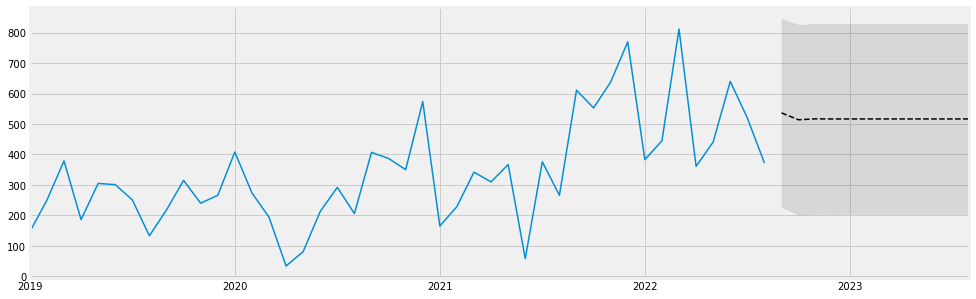

In [260]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)d
dataa['electricos'].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast('2023-08-31').summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

In [261]:
## regresion lineal

In [95]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Skforecast: forecasting series temporales

In [ ]:
# https://www.cienciadedatos.net/documentos/py27-forecasting-series-temporales-python-scikitlearn.html

In [206]:
pip install skforecast==0.4.1 --user

  Using cached skforecast-0.4.1-py2.py3-none-any.whl (79 kB)
  Attempting uninstall: skforecast
    Found existing installation: skforecast 0.4.3
    Uninstalling skforecast-0.4.3:
      Successfully uninstalled skforecast-0.4.3
Note: you may need to restart the kernel to use updated packages.


In [42]:


# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
#from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
#from skforecast.utils import save_forecaster
#from skforecast.utils import load_forecaster

Fechas train : 2019-01-31 00:00:00 --- 2021-06-30 00:00:00  (n=30)
Fechas test  : 2021-07-31 00:00:00 --- 2022-08-31 00:00:00  (n=14)


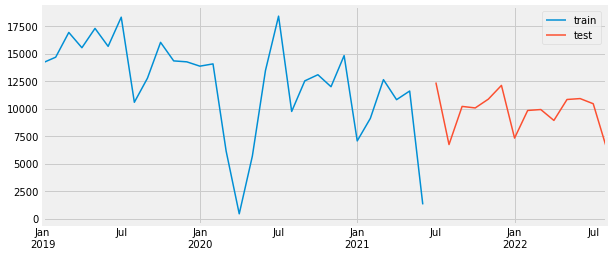

In [190]:


# Separación datos train-test
# ==============================================================================
steps = 14
datos_train = dataa[:-steps]
datos_test  = dataa[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(9, 4))
datos_train['total'].plot(ax=ax, label='train')
datos_test['total'].plot(ax=ax, label='test')
ax.legend();



In [267]:
# Crear y entrenar forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

forecaster.fit(y=dataa['total'].iloc[30:])
forecaster


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2021-07-31 00:00:00'), Timestamp('2022-08-31 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: M 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-10-13 16:47:27 
Last fit date: 2022-10-13 16:47:28 
Skforecast version: 0.4.1 

In [268]:


# Predicciones
# ==============================================================================
steps = 12
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)



2022-09-30     9165.89
2022-10-31     9524.90
2022-11-30     9725.66
2022-12-31    10015.12
2023-01-31     9693.52
Freq: M, Name: pred, dtype: float64

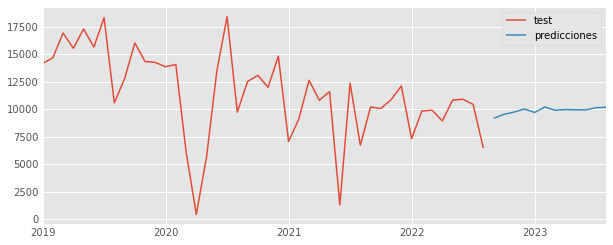

In [269]:


# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
dataa["total"].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();



In [191]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6)

forecaster.fit(y=datos_train['total'].iloc[30:])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-31 00:00:00'), Timestamp('2021-06-30 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: M 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-10-13 15:47:34 
Last fit date: 2022-10-13 15:47:34 
Skforecast version: 0.4.1 

In [264]:
steps = 26
predicciones = forecaster.predict(steps=steps)

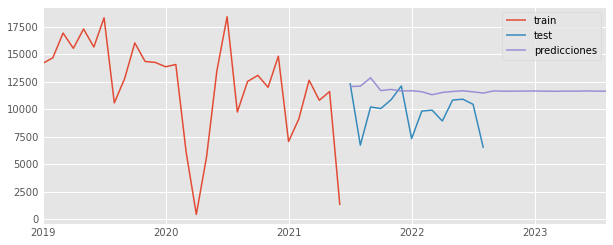

In [265]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['total'].plot(ax=ax, label='train')
datos_test['total'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [201]:
# Error test
# ==============================================================================
error_mse = mean_squared_error(
                y_true = datos_test['total'],
                y_pred = predicciones
            )

print(f"Error de test (mse): {error_mse}")



Error de test (mse): 5154758.258478572


In [237]:
regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 14
             )

forecaster.fit(y=datos_train['total'])

In [238]:
predicciones = forecaster.predict(steps=steps)

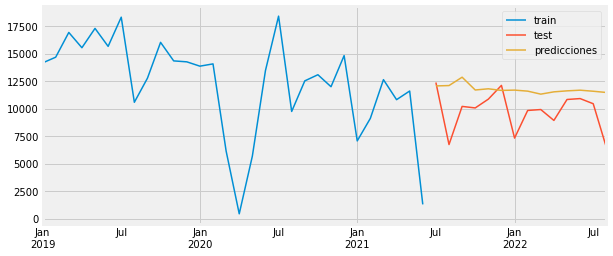

In [239]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['total'].plot(ax=ax, label='train')
datos_test['total'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [185]:
# Crear y entrenar forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

forecaster.fit(y=dataa['electricos'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2019-01-31 00:00:00'), Timestamp('2022-08-31 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: M 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-10-13 15:42:13 
Last fit date: 2022-10-13 15:42:13 
Skforecast version: 0.4.1 

In [186]:
# Predicciones
# ==============================================================================
steps = 12
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)

2022-09-30    551.13
2022-10-31    474.78
2022-11-30    426.79
2022-12-31    488.15
2023-01-31    427.90
Freq: M, Name: pred, dtype: float64

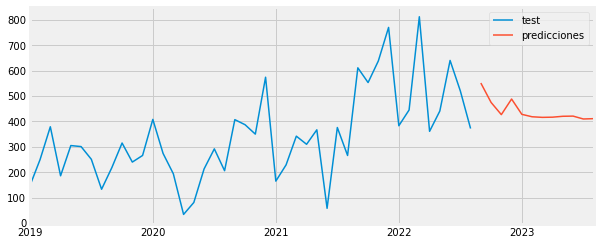

In [187]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
dataa["electricos"].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();
